# **1. Perkenalan Dataset**


Dataset yang digunakan adalah Titanic – Machine Learning from Disaster (Kaggle). Dataset ini berisi data penumpang Titanic dan label target Survived (0 = tidak selamat, 1 = selamat). File yang dipakai pada eksperimen ini adalah train.csv karena hanya file tersebut yang memiliki kolom target Survived. Dataset bersifat tabular dan cocok untuk klasifikasi biner. Beberapa fitur penting yang umum digunakan antara lain Pclass, Sex, Age, SibSp, Parch, dan Fare, sedangkan beberapa kolom seperti Cabin sering memiliki missing value besar.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

pd.set_option("display.max_columns", 200)
sns.set_theme(style="whitegrid")

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
def find_first_existing_path(candidates):
    for p in candidates:
        if os.path.exists(p):
            return p
    return None

#Kandidat path (Colab + struktur repo)
candidates = [
    "/content/train.csv",
    "/content/titanic.csv",
    "titanic_raw/titanic.csv",
    "../titanic_raw/titanic.csv",]

DATA_PATH = find_first_existing_path(candidates)
if DATA_PATH is None:
    raise FileNotFoundError(
        "Dataset tidak ditemukan.\n"
        "Pastikan Anda sudah:\n"
        "- Upload train.csv ke Colab (jadi /content/train.csv), ATAU\n"
        "- Menyimpan raw di repo: titanic_raw/titanic.csv\n")
df = pd.read_csv(DATA_PATH)
print("Loaded:", DATA_PATH)
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
display(df.head())

# Validasi
if "Survived" not in df.columns:
    raise ValueError(
        "Kolom 'Survived' tidak ada.\n"
        "Ini berarti file yang terbaca BUKAN train.csv Kaggle (biasanya test.csv).\n"
        "Solusi: download Kaggle Titanic Competition -> train.csv, lalu gunakan file itu.")

Loaded: /content/train.csv
Shape: (891, 12)
Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing values (jumlah):


,0
Cabin,687
Age,177
Embarked,2



Statistik deskriptif (numerik):


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292



Statistik deskriptif (kategorikal):


,count,unique,top,freq
Name,891,891,"Dooley, Mr. Patrick",1
Sex,891,2,male,577
Ticket,891,681,1601,7
Cabin,204,147,G6,4
Embarked,889,3,S,644



Distribusi target:


,count
Survived,
0,549
1,342


,proportion
Survived,
0,0.616162
1,0.383838


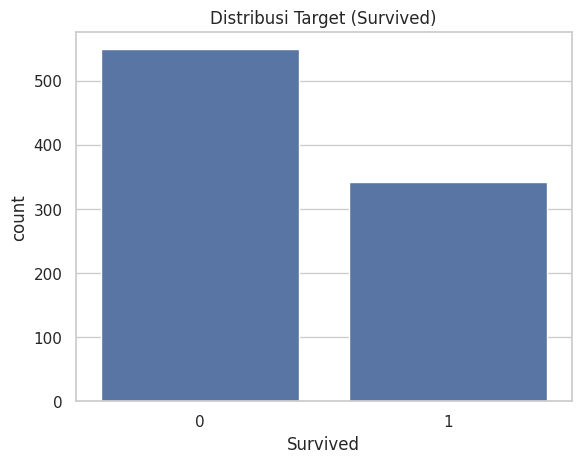

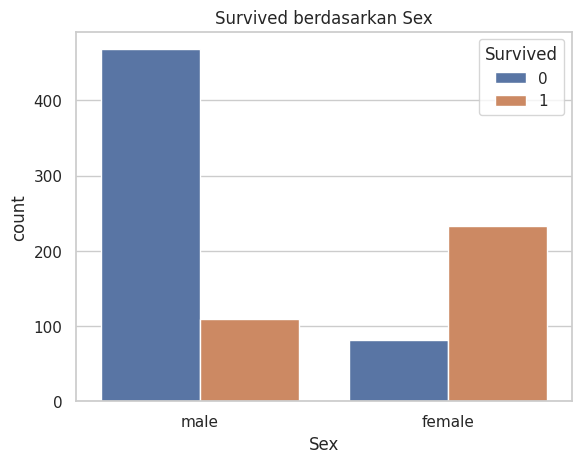

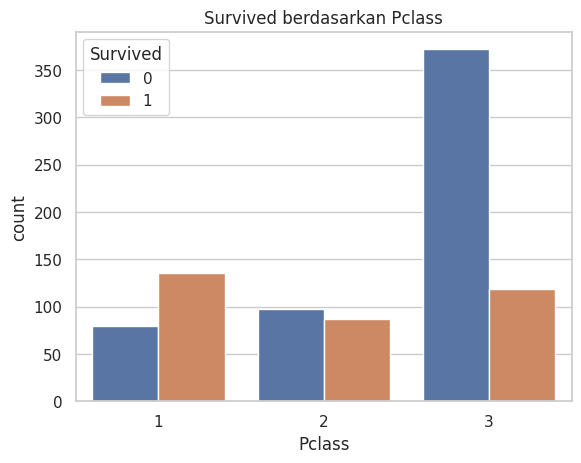

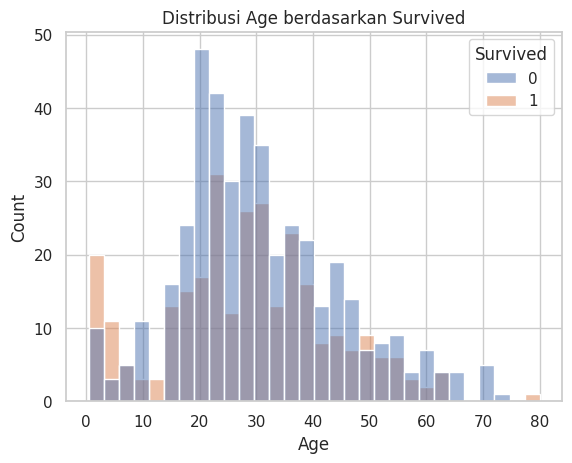

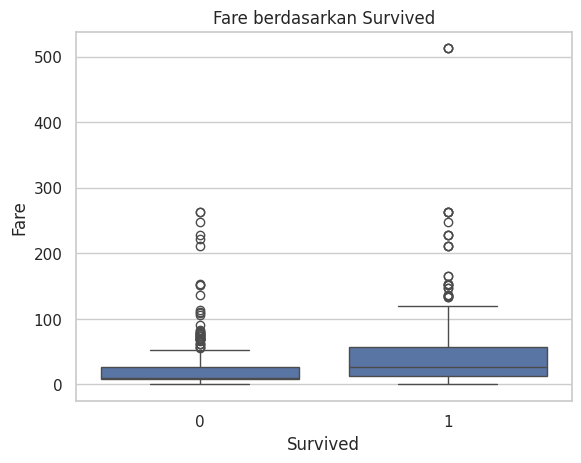

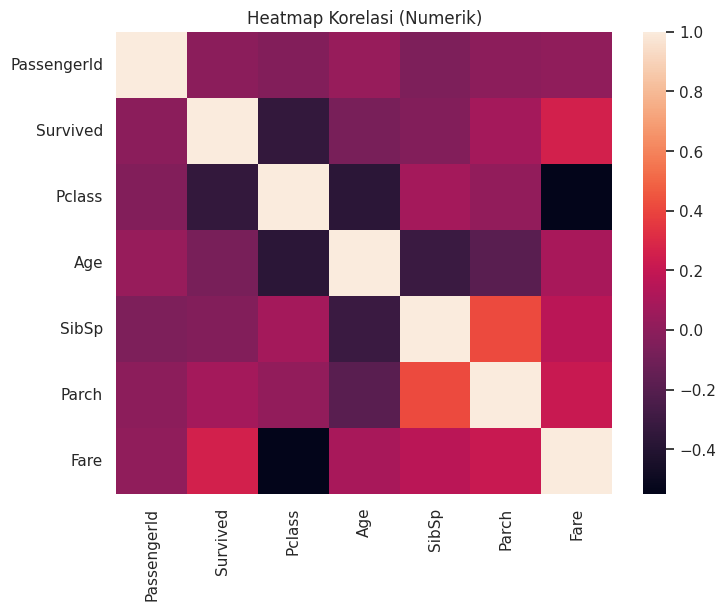

In [3]:
TARGET = "Survived"

print("Info dataset:")
df.info()

print("\nMissing values (jumlah):")
missing = df.isna().sum().sort_values(ascending=False)
display(missing[missing > 0])

# Statistik deskriptif (numerik)
print("\nStatistik deskriptif (numerik):")
num_df = df.select_dtypes(include=[np.number])
display(num_df.describe().T)

# Statistik deskriptif (kategorikal)
print("\nStatistik deskriptif (kategorikal):")
cat_df = df.select_dtypes(exclude=[np.number])
display(cat_df.describe().T)

print("\nDistribusi target:")
display(df[TARGET].value_counts())
display(df[TARGET].value_counts(normalize=True))

# Visualisasi dasar: distribusi target
plt.figure()
sns.countplot(data=df, x=TARGET)
plt.title("Distribusi Target (Survived)")
plt.show()

# Survival vs Sex
if "Sex" in df.columns:
    plt.figure()
    sns.countplot(data=df, x="Sex", hue=TARGET)
    plt.title("Survived berdasarkan Sex")
    plt.show()

# Survival vs Pclass
if "Pclass" in df.columns:
    plt.figure()
    sns.countplot(data=df, x="Pclass", hue=TARGET)
    plt.title("Survived berdasarkan Pclass")
    plt.show()

# Distribusi Age
if "Age" in df.columns:
    plt.figure()
    sns.histplot(data=df, x="Age", hue=TARGET, bins=30, kde=False)
    plt.title("Distribusi Age berdasarkan Survived")
    plt.show()

# Fare boxplot
if "Fare" in df.columns:
    plt.figure()
    sns.boxplot(data=df, x=TARGET, y="Fare")
    plt.title("Fare berdasarkan Survived")
    plt.show()

# Korelasi numerik
num_cols = num_df.columns.tolist()
if len(num_cols) >= 2:
    plt.figure(figsize=(8, 6))
    corr = num_df.corr()
    sns.heatmap(corr, annot=False)
    plt.title("Heatmap Korelasi (Numerik)")
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [4]:
TARGET = "Survived"

# 1) split X/y
X = df.drop(columns=[TARGET]).copy()
y = df[TARGET].copy()

# 2) drop kolom yang biasanya tidak dipakai (baseline)
drop_cols = [c for c in ["Name", "Ticket", "Cabin"] if c in X.columns]
X = X.drop(columns=drop_cols)

# 3) pisahkan kolom numerik vs kategorikal
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numerik:", num_cols)
print("Kategorikal:", cat_cols)

def make_ohe():
    try:
        return OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    except TypeError:
        return OneHotEncoder(handle_unknown="ignore", sparse=False)

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", make_ohe())
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ],
    remainder="drop"
)

# 4) fit-transform
X_processed = preprocessor.fit_transform(X)

# 5) feature names
feature_names = []
feature_names.extend(num_cols)

if len(cat_cols) > 0:
    ohe = preprocessor.named_transformers_["cat"].named_steps["onehot"]
    feature_names.extend(list(ohe.get_feature_names_out(cat_cols)))

X_processed_df = pd.DataFrame(X_processed, columns=feature_names)

# 6) gabungkan dengan target
processed_df = pd.concat([y.reset_index(drop=True), X_processed_df.reset_index(drop=True)], axis=1)

print("Processed shape:", processed_df.shape)
display(processed_df.head())

# 7) simpan output
if os.path.isdir("preprocessing"):
    OUT_DIR = os.path.join("preprocessing", "titanic_preprocessing")
elif os.path.isdir("../preprocessing"):
    OUT_DIR = os.path.join("..", "preprocessing", "titanic_preprocessing")
else:
    OUT_DIR = "titanic_preprocessing"

os.makedirs(OUT_DIR, exist_ok=True)

out_csv = os.path.join(OUT_DIR, "titanic_processed.csv")
processed_df.to_csv(out_csv, index=False)

out_feat = os.path.join(OUT_DIR, "feature_columns.txt")
with open(out_feat, "w", encoding="utf-8") as f:
    for col in feature_names:
        f.write(col + "\n")

print("Saved:", out_csv)
print("Saved:", out_feat)

#download output dari colab
try:
    from google.colab import files
    import shutil

    zip_name = "titanic_preprocessing_output"
    zip_path = shutil.make_archive(zip_name, "zip", OUT_DIR)
    print("Zipped:", zip_path)

    files.download(zip_path)
except Exception as e:
    print("Skip download (bukan di Colab / ada error kecil):", e)

Numerik: ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Kategorikal: ['Sex', 'Embarked']
Processed shape: (891, 12)


,Survived,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,-1.730108,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,1,-1.726220,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,1,-1.722332,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,1,-1.718444,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,0,-1.714556,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


Saved: titanic_preprocessing/titanic_processed.csv
Saved: titanic_preprocessing/feature_columns.txt
Zipped: /content/titanic_preprocessing_output.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>